In [826]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dt_apriltags import Detector
import numpy as np

In [827]:
#img = cv2.imread('rov_pool.jpg')

#img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)
#plt.imshow(img)
cap = cv2.VideoCapture('AUV_Vid.mkv')

ret, frame = cap.read()

#vcap = cv2.VideoCapture("rtsp://10.29.17.108:8554/test")
#ret, frame = vcap.read()
#plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))



In [ ]:
def common_member(a, b):
    a_set = set(a)
    b_set = set(b)
    if (a_set & b_set):
        return True
    else:
        return False

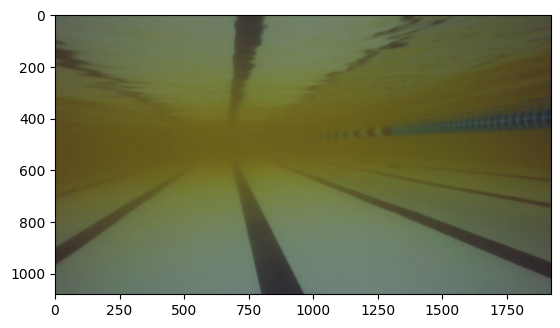

In [834]:
def makegray(img):
    gray = cv2.cvtColor(img,cv2.IMREAD_GRAYSCALE) # convert to grayscale
    return gray

plt.imshow(makegray(frame))

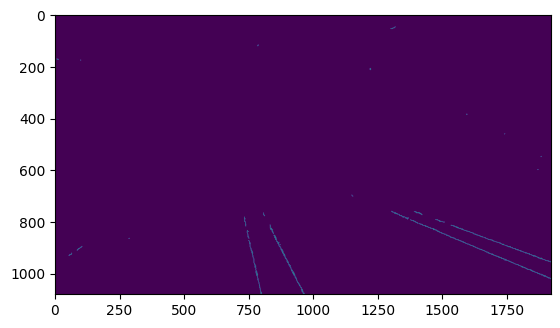

In [837]:
def detectedges(img):
    edges = cv2.Canny(img, 50, 100, apertureSize=3) # detect edges
    return edges

plt.imshow(detectedges(makegray(frame)))

In [840]:
def makelines(edges):
    lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=100,
                maxLineGap=10,
        ) # detect lines
    return lines
print(makelines(detectedges(makegray(frame))))

[[[1373  793 1704  933]]

 [[1686  925 1844  992]]

 [[1531  815 1879  942]]

 [[ 831  824  959 1076]]

 [[1707  933 1918 1022]]

 [[ 750  875  797 1079]]

 [[ 854  867  932 1020]]]


In [ ]:
def drawlane(img):
    grey = makegray(img)
    edges = detectedges(img)
    
    

In [ ]:
count = 0
frequency = 100
while ret:
    if count%frequency == 0:
            plt.imshow(cv2.cvtColor(drawLane(frame), cv2.IMREAD_GRAYSCALE))
    count +=1
    re, frame = cap.read()


In [828]:
#cv2.line(img, (0, 0), (100, 100), (255, 0, 0), 5)
#cv2.rectangle(img, (0, 0), (100, 100), (0, 255, 0), 5)
#cv2.circle(img, (50, 50), 50, (0, 0, 255), 5)
#pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
#pts = pts.reshape((-1, 1, 2))
#cv2.polylines(img, [pts], True, (0, 255, 255), 5)
#cv2.putText(img, 'Hello World!', (0, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)


None


[[ 911  651 1156 1076]]
[]


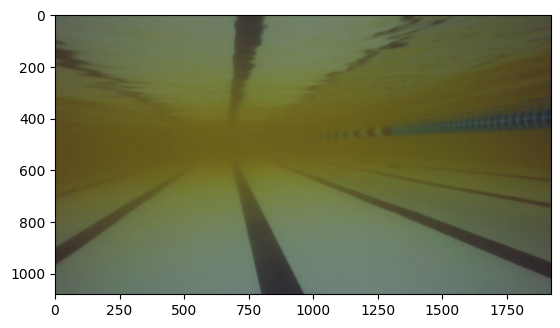

In [832]:
gradient1 = [None]
gradient = []
if lines == None:
    pass
else:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        gradient1[0] = (y2-y1)/(x2-x1)

        if common_member(gradient, gradient1) == False:
            gradient.append(gradient1[0])
        cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)

print(line)
print(gradient)
plt.imshow(frame)

In [833]:
'''at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)
tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
plt.imshow(color_img)'''

"at_detector = Detector(families='tag36h11',\n                       nthreads=1,\n                       quad_decimate=1.0,\n                       quad_sigma=0.0,\n                       refine_edges=1,\n                       decode_sharpening=0.25,\n                       debug=0)\ntags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)\ncolor_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)\nfor tag in tags:\n    for idx in range(len(tag.corners)):\n        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))\n\n    cv2.putText(color_img, str(tag.tag_id),\n                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),\n                fontFace=cv2.FONT_HERSHEY_SIMPLEX,\n                fontScale=0.8,\n                color=(0, 0, 255))\nplt.imshow(color_img)"